In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from utilis.preprocess import load_data, preprocess
from utilis.cluster import Clustering
from utilis.evaluation import Evaluate
from utilis.visualization import  plot_clustering

class Model_runner(object):
    def __init__(self):
       
        self.config = {}
        self.config['data_name'] = '3_14_T110c'
        self.config['load_data'] = {
            'file_t1':'data/T1_point.txt',
             'file_t2':'data/T2_point.txt',
             'file_fvol':'data/T1T2_3_14_T110c.txt' # T110c/ as_received
        }
        self.config['preprocess'] = {
            'min_t1t2_ratio':0.5, 
            't1_max': 600, 
            'fc':0.1, 
            'variation_length': 0.01,
            'save':False,
            'reload': True,
            'file_xtrain':'data_process/X_train_1_223_T110c.txt',
            'file_xmanifold':'data_process/X_manifold_1_223_T110c.txt'
        }
        self.config['clustering']={
            'model_names' : ['GMM','kmean'],
            'n_clusters': 5,
            'adjust_label': True,
            'save_model':False,
            'file_dir':'model/'
        } 
        
        self.config['evaluate']={
        'distance_min':0.05,
        'point_min': 10 #0.05, point_min = 50   
        }
        
        self.data_name = self.config['data_name']
        self.config['clustering']['file_dir'] += self.data_name
        self.t1_domain = None
        self.t2_domain = None
        self.t2_grid = None
        self.t1_grid = None
        self.f_grid = None
        self.X_train = None 
        self.X_manifold = None
        
        
    def load_data(self):
        self.t1_grid, self.t2_grid, self.f_grid = load_data(self.config['load_data'])
        return self
    
    def preprocess(self):
        self.X_train, self.X_manifold = preprocess(self.t2_grid, self.t1_grid, self.f_grid, 
            self.config['preprocess'])
        return self
    
    def fit(self):
        clustering = Clustering(self.X_train, self.config['clustering'])
        clustering.model_init()
        clustering.fit()
        self.model_names = clustering.model_names
        self.y_preds = clustering.y_preds
        return self
    
    def evaluate(self):
        evalu = Evaluate(self.model_names, self.X_train, self.y_preds, self.config['evaluate'])
        evalu.fit()
        self.metrics = evalu.metrics
        self.boundary_points = evalu.boundary_points

### documentation
- Use NoRM 3_14_T110c as example
- raw data is in 'data/ *.txt' folder

In [6]:
nmr_cluster = Model_runner()

# setting parameters
nmr_cluster.config['clustering']['n_clusters']=5 # cluster number 
nmr_cluster.config['clustering']['model_names'] =  ['birch','complete','GMM','kmean','spectral','ward'] # model 

# running clustering
nmr_cluster.load_data().preprocess().fit()

C:\Users\hj5446\AppData\Local\Continuum\Anaconda3\envs\frac_detect\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


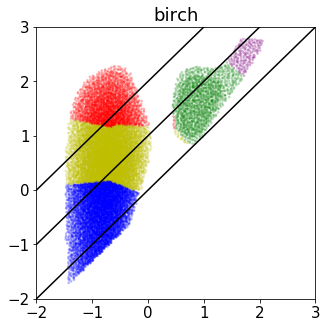

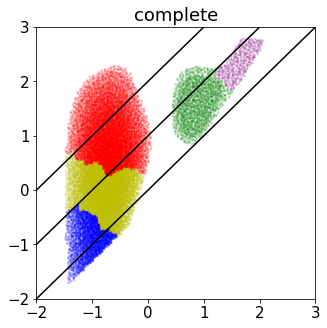

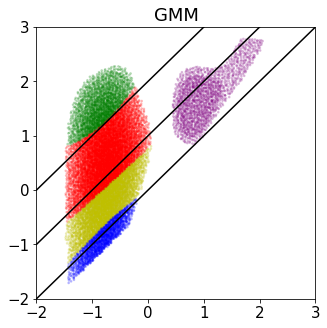

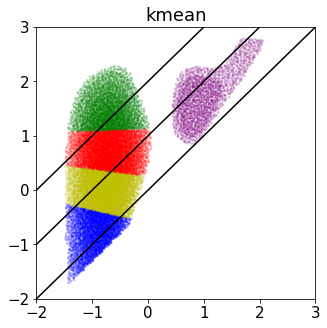

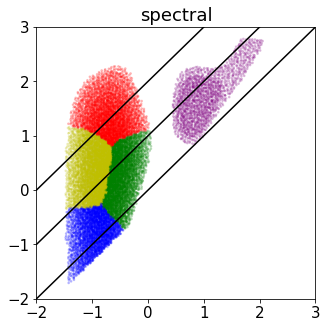

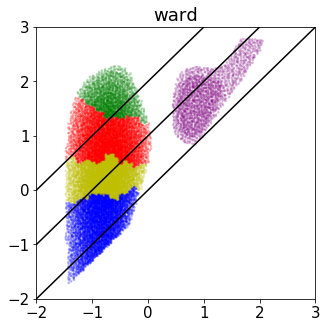

In [4]:
for model_name in nmr_cluster.model_names:
    plot_clustering(nmr_cluster.X_train, nmr_cluster.y_preds[model_name],model_name=model_name, plot_line=True,plot_save=False)